In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:

!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 251MB/s]
100% 1.06G/1.06G [00:04<00:00, 239MB/s]


In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import  keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
#generators -->> create batches for  learge amount of data

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",    #cat-->>0 dogs-->>1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),  #same size changer
    shuffle=True

)


validation_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",    #cat-->>0 dogs-->>1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
  )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
#normalize (all pixcel's values are in between 0 to 1)
def process(img,label):
  img = tf.cast(img/255. ,tf.float32)
  return img,label

train_ds = train_ds.map(process)
validation_ds = validation_data.map(process)

In [6]:
# create a CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7865 - loss: 0.4040 - val_accuracy: 0.5402 - val_loss: 2.2830
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.8100 - loss: 0.3486 - val_accuracy: 0.7984 - val_loss: 0.4222
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8365 - loss: 0.3017 - val_accuracy: 0.6474 - val_loss: 1.5507
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8557 - loss: 0.2554 - val_accuracy: 0.8250 - val_loss: 0.5273
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8775 - loss: 0.2232 - val_accuracy: 0.7842 - val_loss: 0.5106
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.8847 - loss: 0.1989 - val_accuracy: 0.8408 - val_loss: 0.5806
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8967 - loss: 0.1792 - val_accuracy: 0.8328 - val_loss: 0.6394
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.9076 - loss: 0.1709 - 

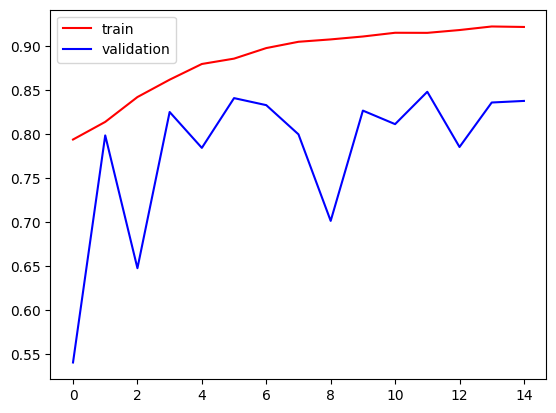

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

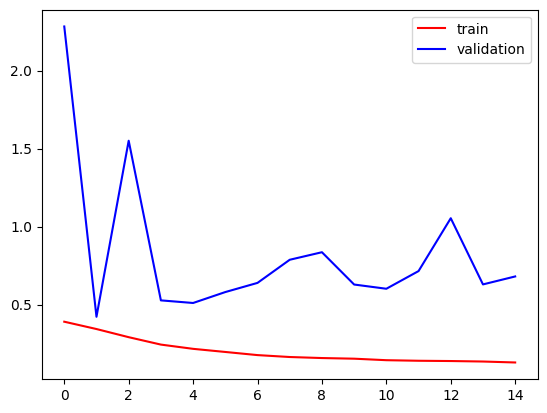

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

test_img1 = cv2.imread('/content/dog.jpg')
test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape((1,256,256,3)) #jehetu batcha img pass kori tai..aikhane 1 tai img tai

In [21]:
test_img2 = cv2.imread('/content/Kitty....webp')
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))

array([[[116, 150, 180],
        [116, 150, 180],
        [116, 150, 180],
        ...,
        [111, 149, 179],
        [111, 149, 179],
        [111, 149, 179]],

       [[116, 150, 180],
        [116, 150, 180],
        [116, 150, 180],
        ...,
        [111, 149, 179],
        [111, 149, 179],
        [111, 149, 179]],

       [[116, 150, 180],
        [116, 150, 180],
        [116, 150, 180],
        ...,
        [111, 149, 179],
        [111, 149, 179],
        [111, 149, 179]],

       ...,

       [[121, 155, 185],
        [121, 155, 185],
        [121, 155, 185],
        ...,
        [122, 156, 186],
        [122, 156, 186],
        [122, 156, 186]],

       [[121, 155, 185],
        [121, 155, 185],
        [121, 155, 185],
        ...,
        [122, 156, 186],
        [122, 156, 186],
        [122, 156, 186]],

       [[121, 155, 185],
        [121, 155, 185],
        [121, 155, 185],
        ...,
        [122, 156, 186],
        [122, 156, 186],
        [122, 156, 186]]], dtype=uint8)
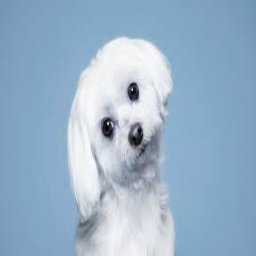

In [17]:
test_img1

In [18]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [24]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1.]], dtype=float32)

array([[[145, 137, 139],
        [150, 158, 158],
        [157, 158, 156],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[149, 146, 147],
        [149, 147, 145],
        [143, 143, 143],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[158, 156, 154],
        [156, 152, 157],
        [136, 141, 138],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 13,   7,  27],
        [ 21,  22,  26],
        [ 20,  28,  24],
        ...,
        [ 24,   0,   2],
        [ 20,   1,   2],
        [ 18,   0,   1]],

       [[ 16,  19,  23],
        [ 19,  23,  24],
        [ 27,  24,  25],
        ...,
        [ 22,   1,   2],
        [ 17,   2,   2],
        [ 18,   1,   0]],

       [[  9,  20,  16],
        [ 13,  27,  16],
        [ 20,  23,  28],
        ...,
        [ 16,   3,   0],
        [ 18,   2,   2],
        [ 16,   0,   1]]], dtype=uint8)
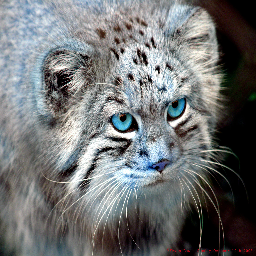

In [23]:
test_img2

In [25]:
test_img3 = cv2.imread('/content/kitty2.jpg')
test_img3 = cv2.resize(test_img3,(256,256))
test_input3 = test_img3.reshape((1,256,256,3))

In [26]:
model.predict(test_input3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)

array([[[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [237, 237, 237],
        [238, 238, 238],
        [238, 238, 238]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [237, 237, 237],
        [238, 238, 238],
        [238, 238, 238]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [237, 237, 237],
        [238, 238, 238],
        [238, 238, 238]],

       ...,

       [[208, 203, 204],
        [193, 191, 191],
        [207, 206, 206],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]],

       [[207, 202, 203],
        [192, 190, 190],
        [207, 206, 206],
        ...,
        [228, 228, 228],
        [228, 228, 228],
        [228, 228, 228]],

       [[207, 202, 203],
        [192, 190, 190],
        [207, 206, 206],
        ...,
        [228, 228, 228],
        [228, 228, 228],
        [228, 228, 228]]], dtype=uint8)
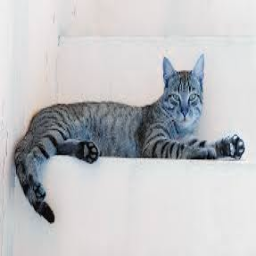

In [28]:
test_img3